# 3. Machine learning for classification: Churn prediction

Start of video: [ML Zoomcamp 3.1 - Churn Prediction Project](https://www.youtube.com/watch?v=0Zw04wdeTQo&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=29&t=34s)

## Problem description:

This week we will talk about machine learning for **classification**. The project we will work on this week is **churn prediction**. Let's imagine we work at a telecom company. We have some customers/clients who uses our services such as phone, internet, tv etc. Not all customers are happy with our services and some of them are thinking of stopping the contract and leave for other companies. We want to identify these clients who wants to leave our compnay or, churn and assign some score 20%, 30%, 85% etc. that tells how likely a customer is going to leave. Closer this number is to 1, higer the likelihood of the person churning. Then we will classify them into 0 and 1s. 0 means custoemr will stay with us and 1 means he is lilely to leave. A customer who is likely to churn, we will send some promotional emails such as 25% discount etc. so that they decide to stay with us. The way we approach this problem is **binary classification**. 

There are many different supervised machine learning algorithms/problems: regression, classification - binary or multiclass classification. Here it is a binary classification problem. Target variables will take values of 0 and 1s.

## 3.1 Churn prediction project

* Link to Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

End of video: [ML Zoomcamp 3.1 - Churn Prediction Project](https://www.youtube.com/watch?v=0Zw04wdeTQo&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=29&t=34s)

Start of video: [ML Zoomcamp 3.2 - Data Preparation](https://www.youtube.com/watch?v=VSGGU9gYvdg&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=30)

## 3.2 Data Preparation

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
#!wget $data -O data-week-3.csv 

In [4]:
ls

data-week-3.csv  WK03-classification-notebook.ipynb


In [5]:
# ! before wget means that we are executing a shell command.

In [6]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.head().T #to see the columns well

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')  #we used the same previous week. If not clear, check it out.

In [9]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [10]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [11]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [12]:
#we need to convert total charges into a number
#tc = pd.to_numeric(df.totalcharges)  #we get error because some nan values are there.

In [13]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [14]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [15]:
tc.isnull().sum()

11

In [16]:
df[tc.isnull()][['customerid', 'totalcharges']] 

,customerid,totalcharges
488,4472-lvygi,NaN
753,3115-czmzd,NaN
936,5709-lvoeq,NaN
1082,4367-nuyao,NaN
1340,1371-dwpaz,NaN
3331,7644-omvmy,NaN
3826,3213-vvolg,NaN
4380,2520-sgtta,NaN
5218,2923-arzlg,NaN
6670,4075-wkniu,NaN


In [17]:
df.totalcharges=df.totalcharges.fillna(0)

# zero is not always the best way in terms of common sense, but in practice it is okay

In [18]:
df[tc.isnull()][['customerid', 'totalcharges']] 

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [19]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [20]:
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [21]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [22]:
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

End of video: [ML Zoomcamp 3.2 - Data Preparation](https://www.youtube.com/watch?v=VSGGU9gYvdg&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=30)

## 3.3 Validation framework

start of video: [ML Zoomcamp 3.3 - Setting Up The Validation Framework](https://www.youtube.com/watch?v=_lwz34sOnSE&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=31)


* Perform the train/validation/test split with Scikit-Learn

In [23]:
from sklearn.model_selection import train_test_split

`train_test_split?` #if we want to see documentation for this function

`train_test_split?` splits dataset into two parts as we see below. 
random_state is the random seed value.

In [24]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [25]:
len(df_full_train), len(df_test)

(5634, 1409)

In [26]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [27]:
len(df_full_train), len(df_train),len(df_val), len(df_test)

(5634, 4225, 1409, 1409)

Now we need to get our y-varibale.

In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [30]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

We haven't deleted churn variable in dataframe `df_full_train`. Reason for this is that we'll look at the target variable little bit in the next lesson.

end of video: [ML Zoomcamp 3.3 - Setting Up The Validation Framework](https://www.youtube.com/watch?v=_lwz34sOnSE&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=31)

start of video: [ML Zoomcamp 3.4 - EDA](https://www.youtube.com/watch?v=BNF1wjBwTQA&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=32)

## 3.4 EDA

In [31]:
df_full_train = df_full_train.reset_index(drop=True)

In [32]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [33]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [34]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [35]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

26% above is also called as the churn rate, the rate at which users churn. 26.99% is our global churn rate.

In [36]:
df_full_train.churn.mean()

0.26996805111821087

In [37]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

Now we'll look at other variables: categorical and numerical.

In [38]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [39]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']  #list of numerical variables

In [40]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [41]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod'] # list of categorical variables

In [42]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

end of video: [ML Zoomcamp 3.4 - EDA](https://www.youtube.com/watch?v=BNF1wjBwTQA&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=32)

start of video: [ML Zoomcamp 3.5 - Feature Importance: Churn Rate And Risk Ratio](https://www.youtube.com/watch?v=fzdzPLlvs40&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=33)

## 3.5 Feature Importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

* Churn rate
* Risk ratio
* Mutual information - later

In [43]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


Now lets look at churn rate of among different groups, instead of looking at glaobal churn rate.

In [44]:
df_full_train[df_full_train.gender=='female'].head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
5,4765-oxppd,female,0,yes,yes,9,yes,no,dsl,yes,...,yes,yes,no,no,month-to-month,no,mailed_check,65.00,663.05,1
9,1732-vhubq,female,1,yes,yes,47,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,no,bank_transfer_(automatic),70.55,3309.25,1
11,7017-vfuly,female,0,yes,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,bank_transfer_(automatic),20.10,43.15,0
13,1374-dmzui,female,1,no,no,4,yes,yes,fiber_optic,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,94.30,424.45,1


In [45]:
churn_female = df_full_train[df_full_train.gender=='female'].churn.mean()
churn_female

0.27682403433476394

In [46]:
churn_male = df_full_train[df_full_train.gender=='male'].churn.mean()
churn_male

0.2632135306553911

In [47]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

We can do this for different categories. In stead of looking at genders, we cab look at partners.

In [48]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

We can do the same as above.

In [49]:
churn_partner = df_full_train[df_full_train.partner=='yes'].churn.mean()
churn_partner

0.20503330866025166

This is below global rate.

In [50]:
global_churn-churn_partner

0.06493474245795922

In [51]:
churn_no_partner = df_full_train[df_full_train.partner=='no'].churn.mean()
churn_no_partner

0.3298090040927694

Churn rate for customers without partner is about 5% more than global churnrate.

In [52]:
global_churn-churn_no_partner

-0.05984095297455855

Thus is says that partner variable is more important than gender variable. It seems gender really doesn't matter. 

#### Risk ratio

Instead of subtracting (Difference) we can also divide one by another. If greater than 1, they are more likely to churn and if less than 1, they are less likely to churn. Both gives us the same information but in a different way. 

In [53]:
churn_no_partner/global_churn

1.2216593879412643

In [54]:
churn_partner/global_churn

0.7594724924338315

Thus people without a partner is more likely to churn.<br>
By this **Difference** or **Risk Ratio** analysis we can determine which variables are important. <br>
We can do this for every variable like that.
This can be implemented directly in SQL like below.

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

Now we'll translate this SQL query into Pandas.

In [55]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [56]:
df_full_train.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [57]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


We can repeat this for all the variables we have. 

In [58]:
from IPython.display import display

In [59]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


end of video: [ML Zoomcamp 3.5 - Feature Importance: Churn Rate And Risk Ratio](https://www.youtube.com/watch?v=fzdzPLlvs40&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=33)

start of video: [ML Zoomcamp 3.6 - Feature Importance: Mutual Information](https://www.youtube.com/watch?v=_u2YaGT6RN0&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=35)

## 3.6 Feature importance: Mutual information

Mutual information is a way to measure importance of **categorical** variables. In previous section we saw **risk ratio** which is a way to look at relative importance of different unique values or,groups e.g. male or female in gender variable.Mutual information tells us how important each variable is.  

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

* [https://en.wikipedia.org/wiki/Mutual_information](https://en.wikipedia.org/wiki/Mutual_information)

Higher the mutual information is, the more we learn about Churn by observing the value of a particular variable.

In [60]:
from sklearn.metrics import mutual_info_score

In [61]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [62]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

Regardless of the order, its value is the same. This tells us about how much we learn about the contract variable by observing Churn or vice versa.

In [63]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

Thus we see with gender that, it is not very important at all. Thus if somebody says that this customer is female, we learn nothing about if that customer is going to churn or not. If a customer has a month-to-moth contract, we know that this person is likely to churn. We can also check for other variables e.g. partner.

In [64]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

We can apply this technique to all the categorical variables we have and see which of them has highest mutual information.

In [65]:
def mutual_info_churn_Score(series):
    return mutual_info_score(series, df_full_train.churn)
    

In [66]:
df_full_train[categorical].apply(mutual_info_churn_Score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [67]:
mi = df_full_train[categorical].apply(mutual_info_churn_Score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

end of video: [ML Zoomcamp 3.6 - Feature Importance: Mutual Information](https://www.youtube.com/watch?v=_u2YaGT6RN0&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=35)

start of video: [ML Zoomcamp 3.7 - Feature Importance: Correlation](https://www.youtube.com/watch?v=mz1707QVxiY&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=35)

### 3.7 Feature importance : Correlation

Here we will look at the numerical variables. 

* correlation coefficient: [https://en.wikipedia.org/wiki/Pearson_correlation_coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

This is a way to measure the degree of dependency between two variables. Let's say we have two variables $x$ and $y$ and correlation coeefficient $r$ lies between $-1$ and $1$, thus $-1\leq r \leq 1$. Negative correlation means when values of $x$ goes up, values of $y$ goes down. Positive correlation means the reverse. When the correlation is between $0$ and $0.1$ or in the minus side between $0$ and $-0.1$, then correlation is almost nonexistent. Lets say its **LOW**. For values between 0.1 or, 0.2 and 0.5 it is **MODERATE CORRELATION**. Between 0.5 or, 0.6 to 1, this is **VERY STRONG** correlation. Close to 1 is very strong correlation. <br>

This is for cases when x and y both are real numbers. It can be any numbers. However in our case y (churn) is binary variable.

In [68]:
df_full_train[numerical].head()

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75


In [69]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

* Negative correlation with tenure means, with increase of tenure churn rate goes down i.e. longer a customer stays, less likely they are going to churn. 

* Higher the monthly charges, more likely they are to churn.

* Higher the total charges, less likely they are to leave. This is counter intuitive. But this is because longer one stays more they pay (total charges) and less likely they are to leave. 

We can actually check this in our code.

In [70]:
df_full_train[df_full_train.tenure <=2].churn.mean()

0.5953420669577875

Churn rate is very high (60%) among customers who stays less than 2 months. If we look at this percentage among customers staying more than 2 months: 

In [71]:
df_full_train[df_full_train.tenure > 2].churn.mean()

0.22478269658378816

In [72]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

Above is the Churn rate among custoemrs who stays between 2 and 12 months.

In [73]:
df_full_train[df_full_train.tenure >= 12].churn.mean()

0.17986881937436933

We can also plot how churn rate goes with tenure.

Now let's look at the other numerical variable `monthlycharges`.

In [74]:
df_full_train[df_full_train.monthlycharges < 20].churn.mean()

0.08829568788501027

In [75]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [76]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

We can also plot this.

If we don't care about positive or negative correltion, but only about the value we can calculate only absolute value as following:

In [77]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

So this way, we can underdstand how are numerical variable effects our target variable `churn`

end of video: [ML Zoomcamp 3.7 - Feature Importance: Correlation](https://www.youtube.com/watch?v=mz1707QVxiY&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=35)

start of video: [ML Zoomcamp 3.8 - One-Hot Encoding](https://www.youtube.com/watch?v=L-mjQFN5aR0&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=36)

### 3.8 One-hot encoding

* use Scikit-Learn to encode categorical features

Here we will talk about encoding categorical variables with **One-hot encoding**. This is basically encoding a categorical variable in a bunch of binary variables. This we saw in one of our previous videos.If we are wondering, where the name comes from, elements in the matrix with 1 are hot, they kind of get activated and we activate them by placing a one. That is **one-hot encoding**. It comes from electronics. If current pass through a conductor, then it is hot and encoded as 1. Where current doesn't flow are zeros. In previous videos we did this manually. But we don't need to this manually. Just use sci-kit learn for that. 

In [78]:
from sklearn.feature_extraction import DictVectorizer

There are many ways of doing one-hot encoding. Here we use DictVectorizer. It vectorizes dictionaries.

*Q for self-research. What are the other ways of performing one-hot encoding?*

In [79]:
df_train[['gender','contract']].iloc[:100]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


In [80]:
df_train[['gender','contract']].iloc[:100].to_dict() #let's turn it into a dict

{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female',
  10: 'female',
  11: 'male',
  12: 'female',
  13: 'female',
  14: 'female',
  15: 'male',
  16: 'female',
  17: 'female',
  18: 'male',
  19: 'male',
  20: 'male',
  21: 'female',
  22: 'female',
  23: 'female',
  24: 'male',
  25: 'male',
  26: 'female',
  27: 'female',
  28: 'female',
  29: 'female',
  30: 'male',
  31: 'male',
  32: 'female',
  33: 'female',
  34: 'male',
  35: 'female',
  36: 'female',
  37: 'male',
  38: 'male',
  39: 'female',
  40: 'female',
  41: 'male',
  42: 'female',
  43: 'male',
  44: 'male',
  45: 'female',
  46: 'male',
  47: 'female',
  48: 'male',
  49: 'female',
  50: 'male',
  51: 'male',
  52: 'female',
  53: 'male',
  54: 'female',
  55: 'female',
  56: 'male',
  57: 'male',
  58: 'female',
  59: 'female',
  60: 'male',
  61: 'female',
  62: 'male',
  63: 'female',
  64: 'male',
  65: 'male',
  

In [81]:
df_train[['gender','contract']].iloc[:100].to_dict(orient='records') 
#we want to turn each row into a dictionary. If we don't specify anything, it will turn each column into
#a dictionary. We want to do it row wise- Therefore, we say orinet='records'

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

We want to turn each row into a dictionary. If we don't specify anything, it will turn each column into
a dictionary. We want to do it row wise. Therefore, we say orinet='records'

In [82]:
dicts = df_train[['gender','contract']].iloc[:100].to_dict(orient='records') 

In [83]:
dv = DictVectorizer() # lets's first create a new instance of this class

In [84]:
#now we need a method fit of dv. We train our DictVectorizer. By training it means, showing: this is how our data
#looks like, what columns and what values are there.
dv.fit(dicts) 

DictVectorizer()

In [85]:
dv.transform(dicts)

<100x5 sparse matrix of type '<class 'numpy.float64'>'
	with 200 stored elements in Compressed Sparse Row format>

Sparse matrix is a way of encoding data, when there are many zeros. We can read about it by search word 'compressed sparse row format' or in wikipedia sparse matrix . It comes from scipy `scipy.sparse.csr_matrix`. But we will not use Sparse matrices here and we will set it to False and therefore it will give us numpy array.

In [86]:
dv = DictVectorizer(sparse = False)

In [87]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [88]:
dv.get_feature_names_out() #there is this methos in the vectorizer.

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [89]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

This is how we can use the DictVectorizer. First we turn our dataframe into bunch of dictionaries and then we fit our dictVectorizer by showing it.Then it infers, what are the columnn names, what are the variable names and what are the values there. From there it creates this **one-hot encoded** feature matrix.<br>

DictVectorizer is quite smart, in a way that if we have also a numerical variable e.g. `tenure`, it knows that it is a numerical variable and it leaves it like that and we'll not transform it into 1s and 0s like it does with a categorical variable. We'll see it below. 

In [90]:
#Let's add Numerical variable tenure with two categorical variables.
df_train[['gender','contract','tenure']].iloc[:10] 

,gender,contract,tenure
0,female,two_year,72
1,male,month-to-month,10
2,female,month-to-month,5
3,female,month-to-month,5
4,female,two_year,18
5,male,month-to-month,4
6,male,month-to-month,1
7,female,month-to-month,1
8,female,two_year,72
9,female,month-to-month,6


In [91]:
dicts = df_train[['gender','contract','tenure']].iloc[:10].to_dict(orient='records') 
dicts[0]

{'gender': 'female', 'contract': 'two_year', 'tenure': 72}

In [92]:
dv = DictVectorizer(sparse = False)
dv.fit(dicts)
dv.transform(dicts)

array([[ 0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  1.,  0.,  5.],
       [ 0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  1.,  0.,  6.]])

Instead of doing it with three variables, let's do it for all variables.

In [93]:
train_dicts = df_train[categorical+numerical].to_dict(orient='records') 

In [94]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [95]:
dv = DictVectorizer(sparse= False)

In [96]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [97]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [98]:
list(dv.transform(train_dicts[:5])[0]) #just to see how the array looks like

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [99]:
#summed-up codes for one-hot encoding
from sklearn.feature_extraction import DictVectorizer
train_dicts = df_train[categorical+numerical].to_dict(orient='records') 
dv = DictVectorizer(sparse= False)
X_train = dv.fit_transform(train_dicts) #this is same as doing first doing the fit and then transform

writing `X_train = dv.fit_transform(train_dicts)` is equivalent to writing:

```
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)
```

In [100]:
X_train.shape

(4225, 45)

Now we can do the same for our valiation dataset.

In [101]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')
#instead of fit and transform, we will only transform. We don't fit on the validation data set.
X_val = dv.transform(val_dicts)

Now we have feature matrices for train and validation. Now we are ready to train our model.

end of video: [ML Zoomcamp 3.8 - One-Hot Encoding](https://www.youtube.com/watch?v=L-mjQFN5aR0&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=36)

start of video: [ML Zoomcamp 3.9 - Logistic Regression](https://www.youtube.com/watch?v=7KFE2ltnBAg&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=37)

### 3.9 Logistic regression

* Binary classification
* Linear vs logistic regression

Let's quickly look at how sigmoid function looks like:

In [102]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [103]:
z = np.linspace(-7,7,51)

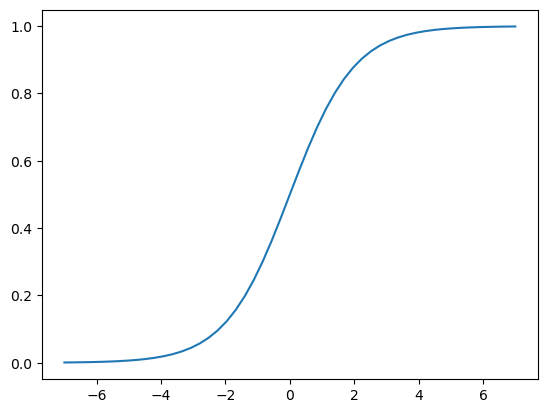

In [104]:
plt.plot(z,sigmoid(z))

In [105]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score  + xi[j] * w[j]
    result = sigmoid(score)
    return

linear and logistic regressions are preety similar. Both are linear models. Linear models have good qualities: they are quite fast, fast to use, fast to use, fast to train. They have lots of good properties. **In summary**, this is how logistic regression looks like. We use sigmoid function to arrive at a probability. In next lesson we'll see how to train logistic regression model with scikit learn.

end of video: [ML Zoomcamp 3.9 - Logistic Regression](https://www.youtube.com/watch?v=7KFE2ltnBAg&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=37)

start of video: [ML Zoomcamp 3.10 - Training Logistic Regression with Scikit-Learn](https://www.youtube.com/watch?v=hae_jXe2fN0&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=38)

### 3.10 Training logistic regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [108]:
model.intercept_[0]

-0.10903802816883623

In [109]:
model.coef_

array([[ 4.74718903e-01, -1.74870035e-01, -4.07531929e-01,
        -2.96856782e-02, -7.79973829e-02,  6.26860155e-02,
        -8.89776959e-02, -8.13913807e-02, -3.43124813e-02,
        -7.33705798e-02, -3.35204111e-01,  3.16498746e-01,
        -8.89776959e-02,  3.67470890e-03, -2.58141254e-01,
         1.41436403e-01,  9.02178946e-03,  6.25326228e-02,
        -8.89776959e-02, -8.12379880e-02,  2.65585305e-01,
        -8.89776959e-02, -2.84290670e-01, -2.31209577e-01,
         1.23526516e-01, -1.66021752e-01,  5.83386905e-02,
        -8.70077709e-02, -3.20585822e-02,  7.04906636e-02,
        -5.91073716e-02,  1.41436403e-01, -2.49119464e-01,
         2.15471237e-01, -1.20360356e-01, -8.89776959e-02,
         1.01654990e-01, -7.08907509e-02, -8.89776959e-02,
         5.21853857e-02,  2.13382351e-01, -8.89776959e-02,
        -2.32087716e-01, -7.04077456e-02,  3.82393065e-04]])

In [110]:
model.coef_[0]

array([ 4.74718903e-01, -1.74870035e-01, -4.07531929e-01, -2.96856782e-02,
       -7.79973829e-02,  6.26860155e-02, -8.89776959e-02, -8.13913807e-02,
       -3.43124813e-02, -7.33705798e-02, -3.35204111e-01,  3.16498746e-01,
       -8.89776959e-02,  3.67470890e-03, -2.58141254e-01,  1.41436403e-01,
        9.02178946e-03,  6.25326228e-02, -8.89776959e-02, -8.12379880e-02,
        2.65585305e-01, -8.89776959e-02, -2.84290670e-01, -2.31209577e-01,
        1.23526516e-01, -1.66021752e-01,  5.83386905e-02, -8.70077709e-02,
       -3.20585822e-02,  7.04906636e-02, -5.91073716e-02,  1.41436403e-01,
       -2.49119464e-01,  2.15471237e-01, -1.20360356e-01, -8.89776959e-02,
        1.01654990e-01, -7.08907509e-02, -8.89776959e-02,  5.21853857e-02,
        2.13382351e-01, -8.89776959e-02, -2.32087716e-01, -7.04077456e-02,
        3.82393065e-04])

In [111]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [112]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

Above are **hard predictions**. These are called hard predictions because they already have the exact labels in terms of 0s and 1s. To actually learn about the probability we use another function as shown below:

In [113]:
model.predict_proba(X_train)

array([[0.90452108, 0.09547892],
       [0.3206697 , 0.6793303 ],
       [0.36631909, 0.63368091],
       ...,
       [0.46839055, 0.53160945],
       [0.95745906, 0.04254094],
       [0.30127054, 0.69872946]])

Above are called **soft predictions**. This is the probability and not a number 0s or 1s. There are two columns: left columns is the probability of being zero and right one is the probability of being 1. So we are interested in the right column. It is Probability of churning. Next, we will select only the right side.

In [114]:
y_pred = model.predict_proba(X_val)[:,1]

Now we can make the hard decision by adjusting our threshold ourselves.

In [115]:
churn_decision = (y_pred >= 0.5)  #default threshold in our function is 0.5
churn_decision

array([False, False, False, ..., False,  True,  True])

In [116]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

Thus, these are the customers, whom we want to send e.g. a promotion email. They are likely to churn.

Lets see now, how accurate our predictions are like we did rmse in regression. Here we'll do similar. It is called **Accuracy** i.e. how many correct predictions we made.

In [117]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [118]:
churn_decision

array([False, False, False, ..., False,  True,  True])

In [119]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

Now we cann see how many of them match.

In [120]:
y_val == churn_decision

array([ True,  True,  True, ...,  True,  True,  True])

In [121]:
(y_val == churn_decision).mean()

0.8034066713981547

Thus we see that 80% of our predictions match.

Let's see what is happening in a different but in bit longer way to understand.

In [122]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [123]:
df_pred

,probability,prediction,actual
0,0.008997,0,0
1,0.204508,0,0
2,0.212208,0,0
3,0.543050,1,1
4,0.213773,0,0
...,...,...,...
1404,0.313666,0,0
1405,0.039358,0,1
1406,0.136387,0,0
1407,0.799770,1,1


This is how our DataFrame looks like. We have the probability. Our prediction and then the actual value. Now we can see how many of them are correct manually. Now lets see how many of them are correct.

In [124]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [125]:
df_pred

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204508,0,0,True
2,0.212208,0,0,True
3,0.543050,1,1,True
4,0.213773,0,0,True
...,...,...,...,...
1404,0.313666,0,0,True
1405,0.039358,0,1,False
1406,0.136387,0,0,True
1407,0.799770,1,1,True


In [126]:
df_pred.correct.mean() #this is the fraction of correct ones
# Also note that here we haven't converted df_pred.correct explicitely to integers. If we don't do it, it happens 
#explicitely

0.8034066713981547

Thus our model is 80% correct i.e. in 80% of the times our model correctly says if a customer churned or not.

end of video: [ML Zoomcamp 3.10 - Training Logistic Regression with Scikit-Learn](https://www.youtube.com/watch?v=hae_jXe2fN0&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=38)

start of video: [ML Zoomcamp 3.11 - Model Interpretation](https://www.youtube.com/watch?v=OUrlxnUAAEA&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=39)

### 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

We trained a model. We briefely looked at the coefficients. Now we we'll look at what these coefficients mean.

In [127]:
dv.get_feature_names()

/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [128]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [129]:
a = [1,2,3,4]
b = 'abcd'
zip(a,b)

In [130]:
list(zip(a,b)) #creates a tuple

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [131]:
dict(zip(a,b)) #turned into a dictionary

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [132]:
dict(zip(dv.get_feature_names(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

We see that it is a long list of features. Let's traina model with smaller features.

In [133]:
small = ['contract', 'tenure','monthlycharges']
#these are the features we'll use for our smaller model

In [134]:
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [135]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [136]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [137]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [138]:
dv_small.get_feature_names()

/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [139]:
X_train_small = dv_small.transform(dicts_train_small)

In [140]:
model_small = LogisticRegression()
model_small.fit(X_train_small,y_train)

LogisticRegression()

In [141]:
w0 = model_small.intercept_[0]
w0

-2.476775659137023

In [142]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [143]:
dict(zip(dv_small.get_feature_names(),w.round(3)))

/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

Now lets try to make sense of these values.

In [144]:
-2.47 + 0.97 + 50*0.027 + 5 * (-0.036)

-0.3300000000000001

In [145]:
sigmoid(_) #here _ means that whatever output of last cell is take it as parameter
#it is a magic variable in Jupyter

0.41824062315816374

So the probability of churning out is 41%

end of video: [ML Zoomcamp 3.11 - Model Interpretation](https://www.youtube.com/watch?v=OUrlxnUAAEA&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=39)

start of video: [ML Zoomcamp 3.12 - Using the Model](https://www.youtube.com/watch?v=Y-NGmnFpNuM&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=40)

## 3.12 Using the model

We have trained two models. One larger models and we had accuracy of 80% and another small model with only 3 features. We haven't checked its accuracy yet. Now we'll get the big model with all the features and we'll train this model on our full train dataset.

In [146]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [147]:
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [148]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_full_train)

In [149]:
y_full_train = df_full_train.churn.values

In [150]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

#or in one line
#model = LogisticRegression.model.fit(X_full_train, y_full_train)

LogisticRegression()

Now repeat it for our test dataset.

In [151]:
dicts_test = df_test[categorical + numerical].to_dict(orient = 'records')

In [152]:
X_test = dv.transform(dicts_test)

In [153]:
y_pred = model.predict_proba(X_test)[:,1] #we need only the first column
y_pred

array([0.06224296, 0.17473875, 0.37026701, ..., 0.00638005, 0.16576097,
       0.59688521])

Now we want to make decision for all the clients with scores higher than 50%, we want to call them likely to churn.

In [154]:
churn_decision = (y_pred >= 0.5)

Let's see, if this churn decision is actually correct.

In [155]:
(churn_decision == y_test).mean()

0.815471965933286

It is 81%, which is slightly more. Also we have little more data + dataset is slightly different. If it is a difference of 95% and 70%, then we clearly have a paroblem. It this case, this is fine and only 1% difference. Now how we can use this model.

In [156]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [157]:
X_small = dv.transform([customer])
X_small

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [158]:
X_small.shape

(1, 45)

In [159]:
model.predict_proba(X_small)

array([[0.5943189, 0.4056811]])

In [160]:
model.predict_proba(X_small)[0,1]

0.40568109779492284

This model tells us that this model is not likely to churn.

In [161]:
y_test[10]

0

Thus our decision was right.

In [162]:
customer = dicts_test[-1] #lets see last customer
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [163]:
X_small = dv.transform([customer])
model.predict_proba(X_small)[0,1]

0.5968852088363773

In [164]:
y_test[-1]

1

Our decision is right. We'll send a promotional email to her.

end of video: [ML Zoomcamp 3.12 - Using the Model](https://www.youtube.com/watch?v=Y-NGmnFpNuM&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=40)

start of video: [ML Zoomcamp 3.13 - Summary](https://www.youtube.com/watch?v=Zz6oRGsJkW4&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=41)

### 3.13 Summary

* Feature importance - risk, mutual information, correlation
* One-hot encoding can  be implemented with `Dictvectorizer`
* Logistic Regression - linear model like linear regression
* Output of log reg - probability

## 3.14 Explore more

More things:

* Try to exclude least useful features

Use scikit-learn in project of last week:
* Re-implement train/val/test split using scikit-learn in the project from the last week
* Also, instead of our own linear regression, use `LinearRegression` (not regularized) and `RidgeRegression` (regularized). Find the best regularization parameter for Ridge.

Read abut:
* correlation coefficient
* sparse matrix

Other projects
* Lead scoring - [https://www.kaggle.com/ashydv/leads-dataset](https://www.kaggle.com/ashydv/leads-dataset)
* Default prediction - [https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

end of video: [ML Zoomcamp 3.13 - Summary](https://www.youtube.com/watch?v=Zz6oRGsJkW4&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=41)

***